### Take two images and compare between any two edge detection techniques and write necessary

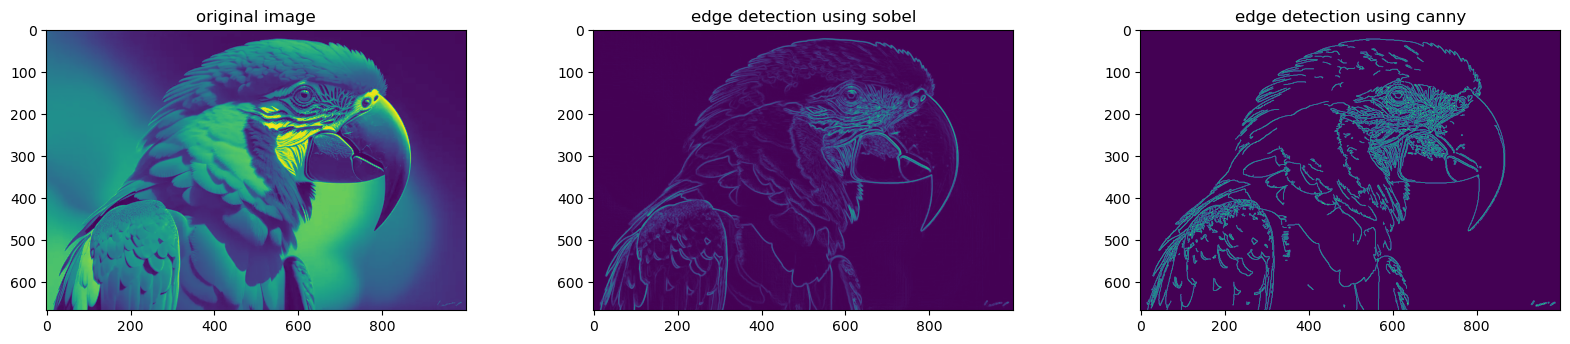

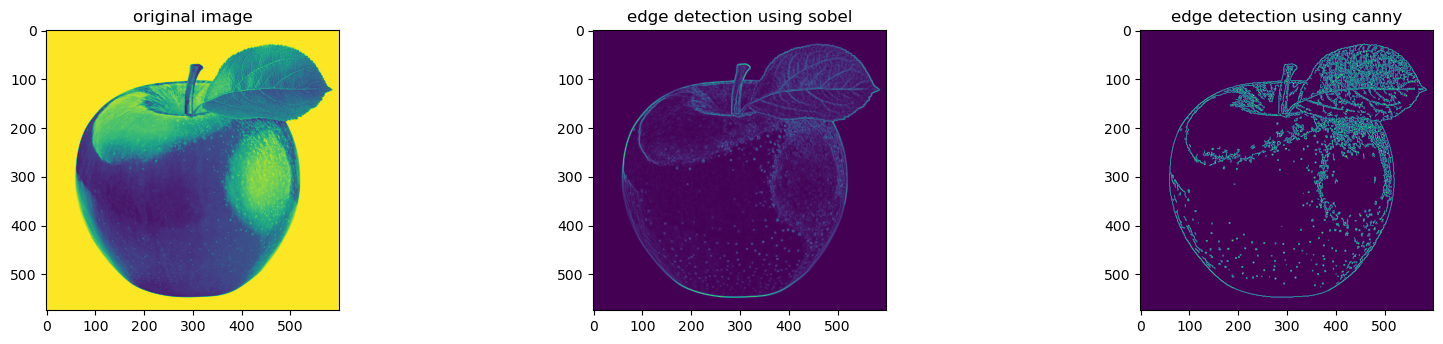

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel

img=(cv2.imread("new4.jpg",0))
fig=plt.figure(figsize=(20,8))

so=sobel(img)
ca=cv2.Canny(img,100,200)

i1=fig.add_subplot(2,3,1)
i1.set_title('original image')
i1.imshow(img)

i2=fig.add_subplot(2,3,2)
i2.set_title('edge detection using sobel')
i2.imshow(so)

i3=fig.add_subplot(2,3,3)
i3.set_title('edge detection using canny')
i3.imshow(ca)

img1=(cv2.imread("apple.jpg",0))
fig=plt.figure(figsize=(20,8))
so=sobel(img1)

ca=cv2.Canny(img1,100,200)
i1=fig.add_subplot(2,3,4)
i1.set_title('original image')
i1.imshow(img1)

i2=fig.add_subplot(2,3,5)
i2.set_title('edge detection using sobel')
i2.imshow(so)

i3=fig.add_subplot(2,3,6)
i3.set_title('edge detection using canny')
i3.imshow(ca)


### Apply Fourier transform on those images.

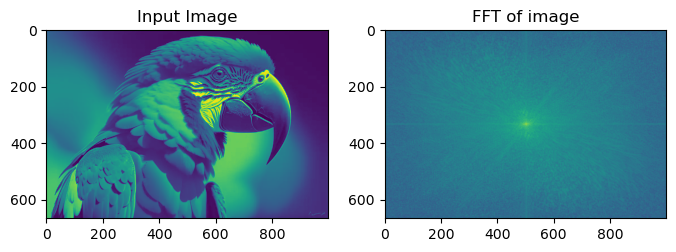

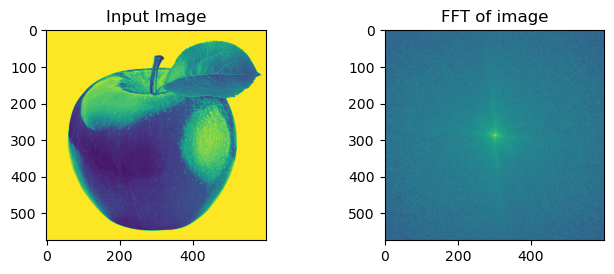

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel

img = cv2.imread('new4.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :,1]))+1)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)

ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()

img = cv2.imread('apple.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :,1]))+1)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(img)

ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,4)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()


### Apply three pass filters on them and write you comment mentioning which filtering process is more feasible to extract the actual image.


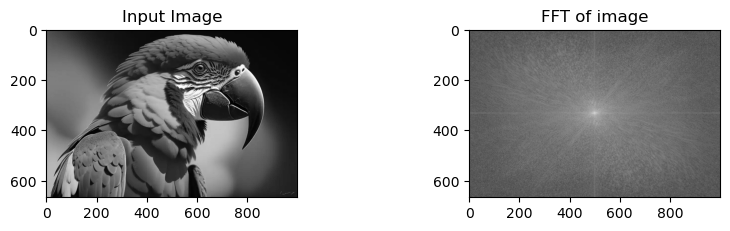

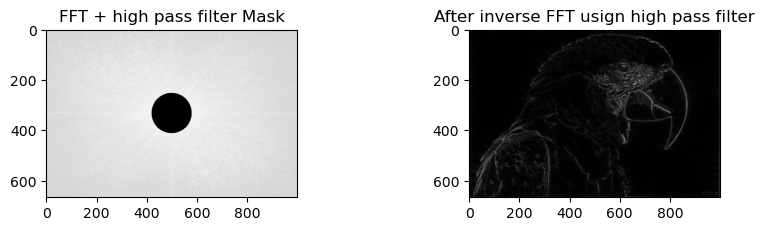

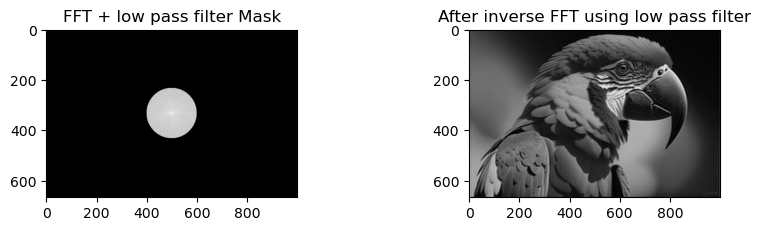

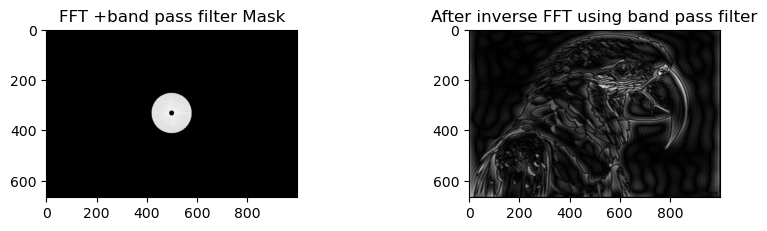

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel

img = cv2.imread('new4.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(4,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')

ax2 = fig.add_subplot(4,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')

# Circular HPF mask, center circle is 0, remaining all ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + high pass filter Mask')
ax4 = fig.add_subplot(4,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT usign high pass filter')
plt.show()

img = cv2.imread('new4.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Circular LPF mask, center circle is 1, remaining all zeros
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,5)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + low pass filter Mask')
ax4 = fig.add_subplot(4,2,6)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using low pass filter')
plt.show()

img = cv2.imread('new4.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,7)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT +band pass filter Mask')
ax4 = fig.add_subplot(4,2,8)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using band pass filter')
plt.show()


### Code for another image:


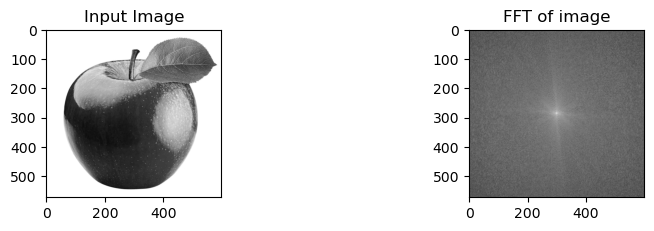

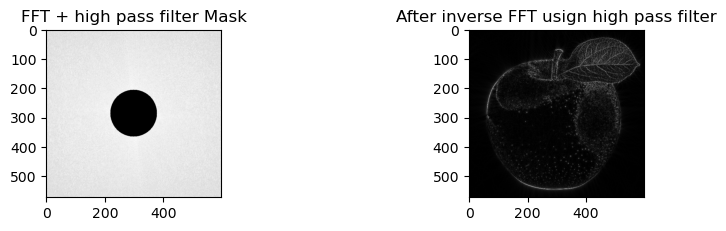

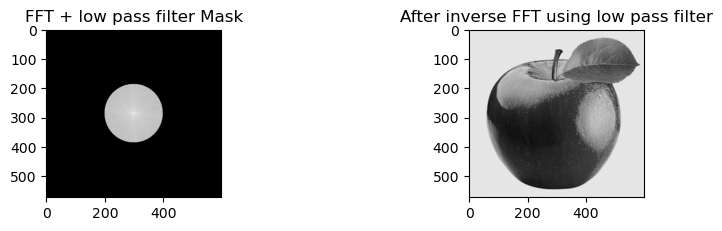

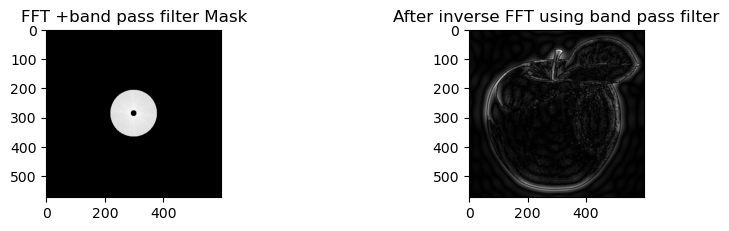

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel

img = cv2.imread('apple.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(4,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')

ax2 = fig.add_subplot(4,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')

# Circular HPF mask, center circle is 0, remaining all ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + high pass filter Mask')
ax4 = fig.add_subplot(4,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT usign high pass filter')
plt.show()

# Circular LPF mask, center circle is 1, remaining all zeros
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,5)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + low pass filter Mask')
ax4 = fig.add_subplot(4,2,6)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using low pass filter')
plt.show()

# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(4,2,7)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT +band pass filter Mask')
ax4 = fig.add_subplot(4,2,8)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using band pass filter')
plt.show()
